### Explore out the briefer analysis on Netflix Dataset with an access to noticeable features attributes for Movies/TV Shows with Viewership Score and present the justifiable insights in points along with an overall summary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import style
style.use("ggplot")

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
netflix =pd.read_csv("netflix daily top 10.csv")             # opening the file and storing in the variable netflix

In [3]:
netflix.info()                                               # to access the basic information about the dataframe like total entries and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [4]:
netflix.head(10)                                   # to view the first 10 datas of the dataset

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [5]:
netflix.columns                               # to get the list of columns in the dataset

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

In [6]:
netflix.nunique()                             # to get the no.of unique values in each columns

As of                   710
Rank                     10
Year to Date Rank        11
Last Week Rank           11
Title                   645
Type                      4
Netflix Exclusive         1
Netflix Release Date    414
Days In Top 10          428
Viewership Score        779
dtype: int64

In [7]:
# to print the unique elements of particular columns in the data set

print("Type              : ",netflix.Type.unique())
print("Netflix Exclusive : ",netflix["Netflix Exclusive"].unique())
print("Year to Date Rank : ",netflix["Year to Date Rank"].unique())
print("Last Week Rank    : ",netflix["Last Week Rank"].unique())

Type              :  ['TV Show' 'Movie' 'Stand-Up Comedy' 'Concert/Perf…']
Netflix Exclusive :  ['Yes' nan]
Year to Date Rank :  ['1' '2' '3' '4' '5' '6' '10' '7' '8' '9' '-']
Last Week Rank    :  ['1' '-' '2' '4' '5' '3' '8' '9' '6' '7' '10']


In [8]:
netflix.duplicated().sum()              # to check for the duplicate rows in the dataset

0

In [9]:
netflix.isnull().sum()                  # to check for the null values in each columns

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [10]:
netflix["Netflix Exclusive"].replace(np.nan,"Not available",inplace=True) # replacing the non value with "not available"

In [11]:
netflix.value_counts("Last Week Rank")                          # to count the no.of times the values repeated in the "Last Week Rank"

Last Week Rank
-     3968
1      653
2      564
3      452
4      336
5      282
6      240
7      193
8      167
9      133
10     112
dtype: int64

In [12]:
netflix.drop("Last Week Rank",axis=1,inplace=True)           # to drop the column which has higher no.of missing ranks

In [13]:
netflix.value_counts("Year to Date Rank")                    # to count the no.of times the values repeated in the "Year to Date Rank" column

Year to Date Rank
-     859
1     708
2     708
3     706
4     705
5     699
6     675
7     633
8     554
9     481
10    372
dtype: int64

In [14]:
netflix["Year to Date Rank"].replace('-',np.nan,inplace=True)

In [15]:
netflix.Type.value_counts()           # to check for the no.of times each cateogory of shows appeared in the top 10

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

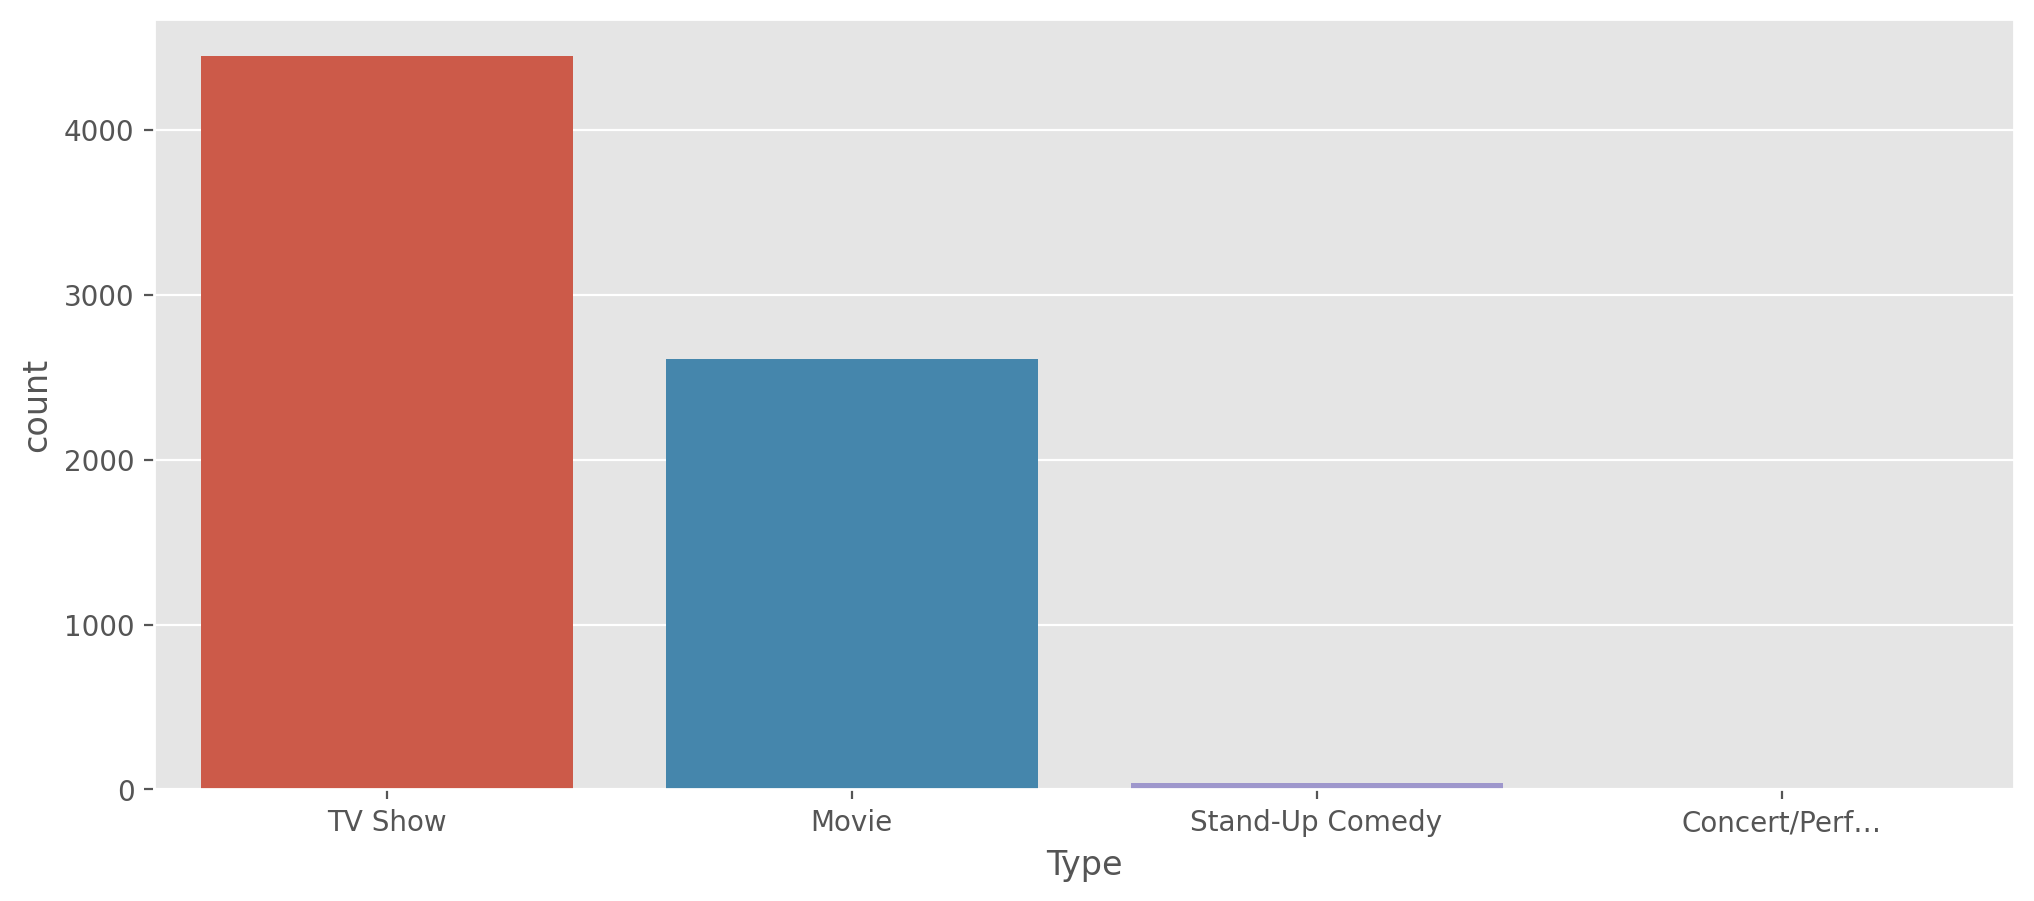

In [16]:
plt.figure(figsize=(12,5),dpi=200)   # visualising the no.of times each category of shows appeared in the top 10
sns.countplot(netflix["Type"])

In [17]:
title_counts = netflix.Title.value_counts()  # to check for the no.of times each shows appeared in the top 10
title_counts

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

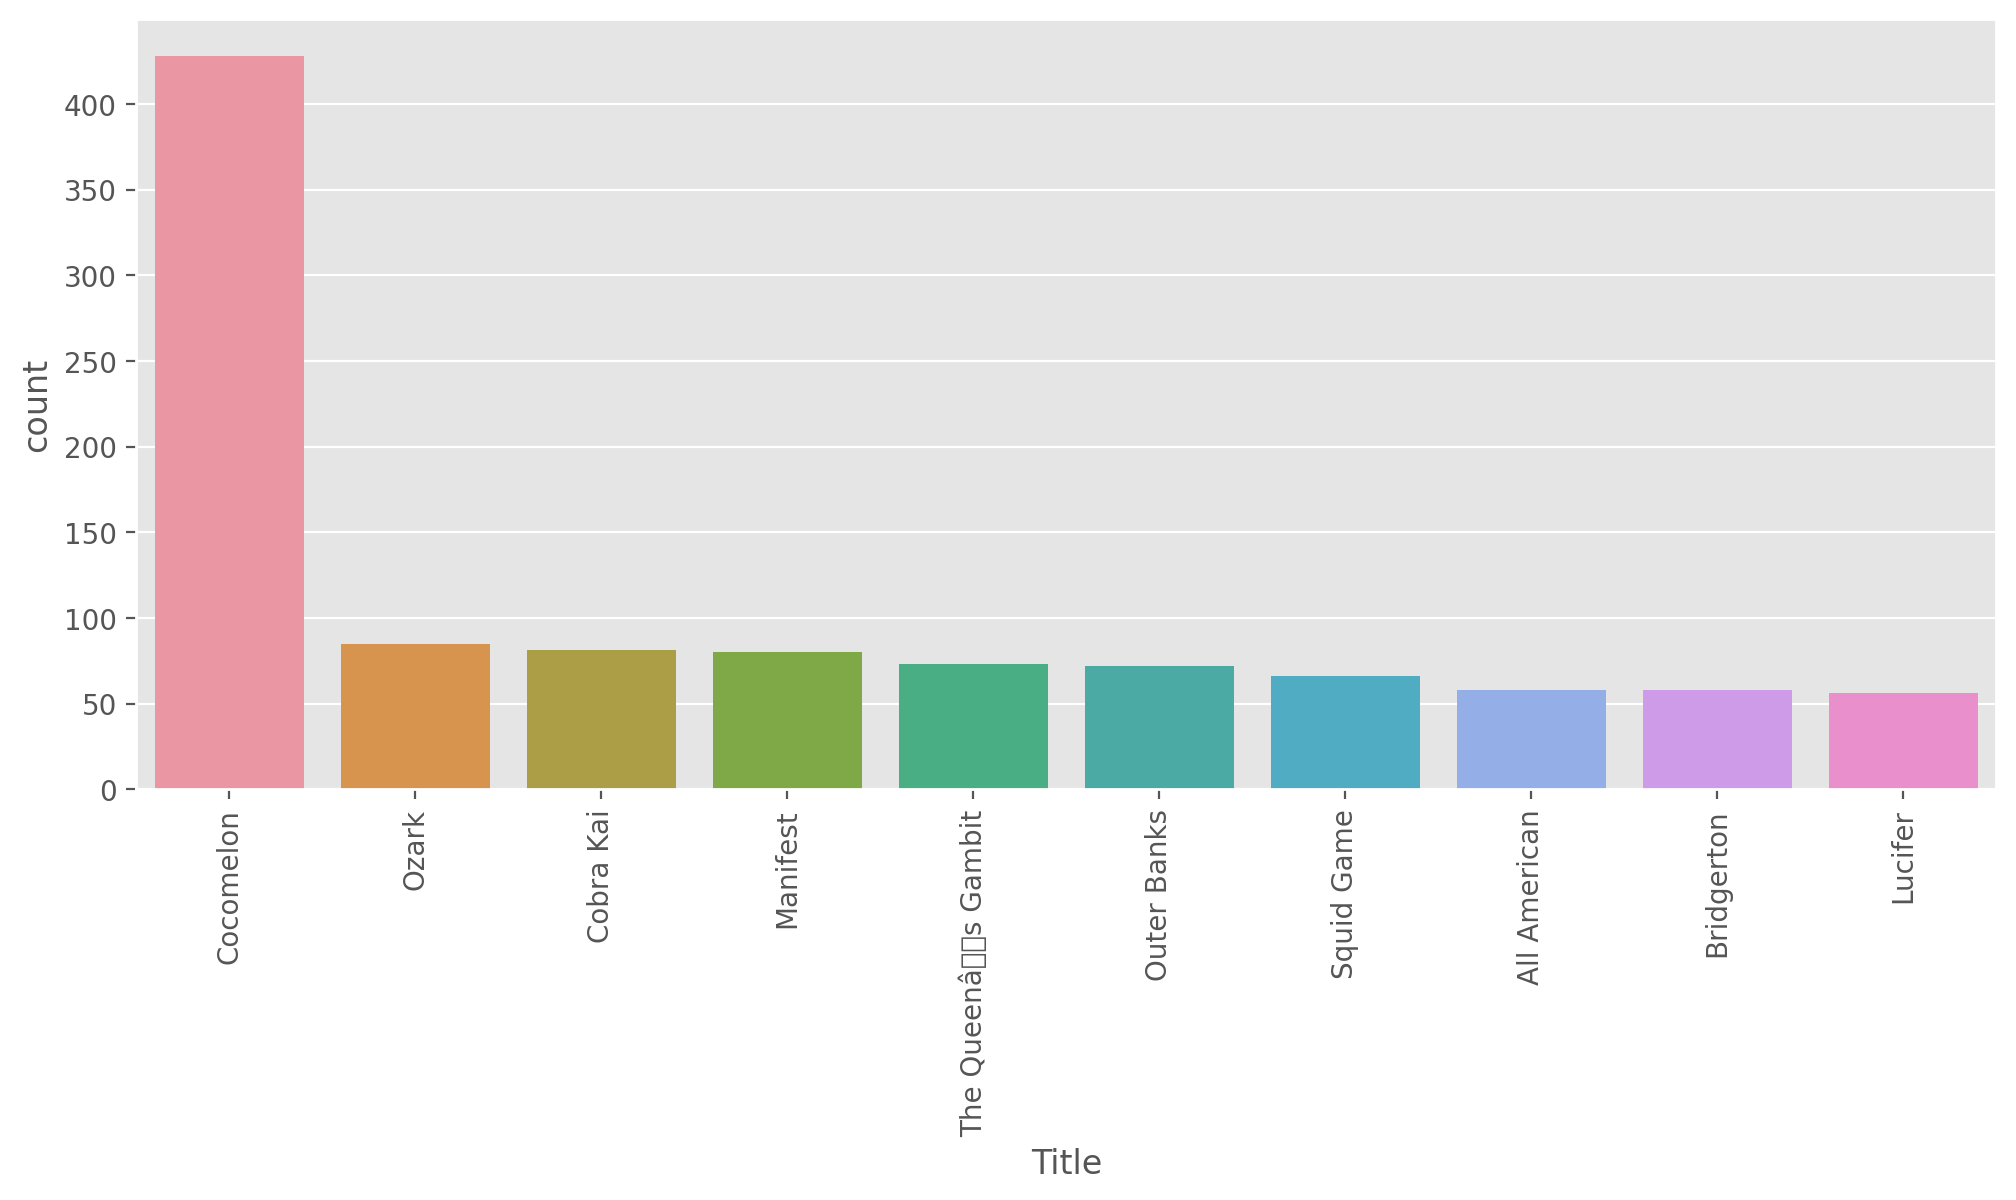

In [18]:
plt.figure(figsize=(12,5),dpi=200)        # visualizing the no.of times each shows appeared in the top 10
sns.countplot(x="Title", order=title_counts.index[0:10], data=netflix)
plt.xticks(rotation = 90)
plt.show()

## Analyzing and visualizing the top shows in each category based on the viewership score

In [19]:
movies = pd.DataFrame(netflix[netflix['Type']=='Movie'].groupby(['Title'])['Viewership Score'].max().sort_values(ascending=False).head(10))
movies["Title"]=movies.index
movies.index=range(0,10)
movies

,Viewership Score,Title
0,213,365 Days
1,204,The Mitchells vs. The Machines
2,189,Donât Look Up
3,171,The Unforgivable
4,166,Vivo
5,162,Red Notice
6,144,We Can Be Heroes
7,141,Hubie Halloween
8,137,How the Grinch Stole Christmas
9,134,Project Power


In [20]:
shows = pd.DataFrame(netflix[netflix['Type']=='TV Show'].groupby(['Title'])['Viewership Score'].max().sort_values(ascending=False).head(10))
shows["Title"]=shows.index
shows.index=range(0,10)
shows

,Viewership Score,Title
0,1474,Cocomelon
1,590,Manifest
2,582,Cobra Kai
3,536,Ozark
4,534,Outer Banks
5,495,Squid Game
6,446,The Queenâs Gambit
7,432,Bridgerton
8,416,All American
9,415,Lucifer


In [21]:
comedy = pd.DataFrame(netflix[netflix['Type']=='Stand-Up Comedy'].groupby(['Title'])['Viewership Score'].max().sort_values(ascending=False))
comedy["Title"]=comedy.index
comedy.index=range(0,6)
comedy

,Viewership Score,Title
0,88,Dave Chappelle: The Closer
1,73,Kevin Hart: Zero F**ks Given
2,25,Jerry Seinfeld: 23 Hours to…
3,24,George Lopez: Weâll Do It f…
4,16,Chris DâElia: No Pain
5,2,Bo Burnham: Inside


In [22]:
concerts = pd.DataFrame(netflix[netflix['Type']=='Concert/Perf…'].groupby(['Title'])['Viewership Score'].max().sort_values(ascending=False))
concerts["Title"]=concerts.index
concerts.index=range(0,1)
concerts

,Viewership Score,Title
0,15,"Ariana Grande: Excuse Me, I…"


(array([0]), [Text(0, 0, 'Ariana Grande: Excuse Me, I…')])

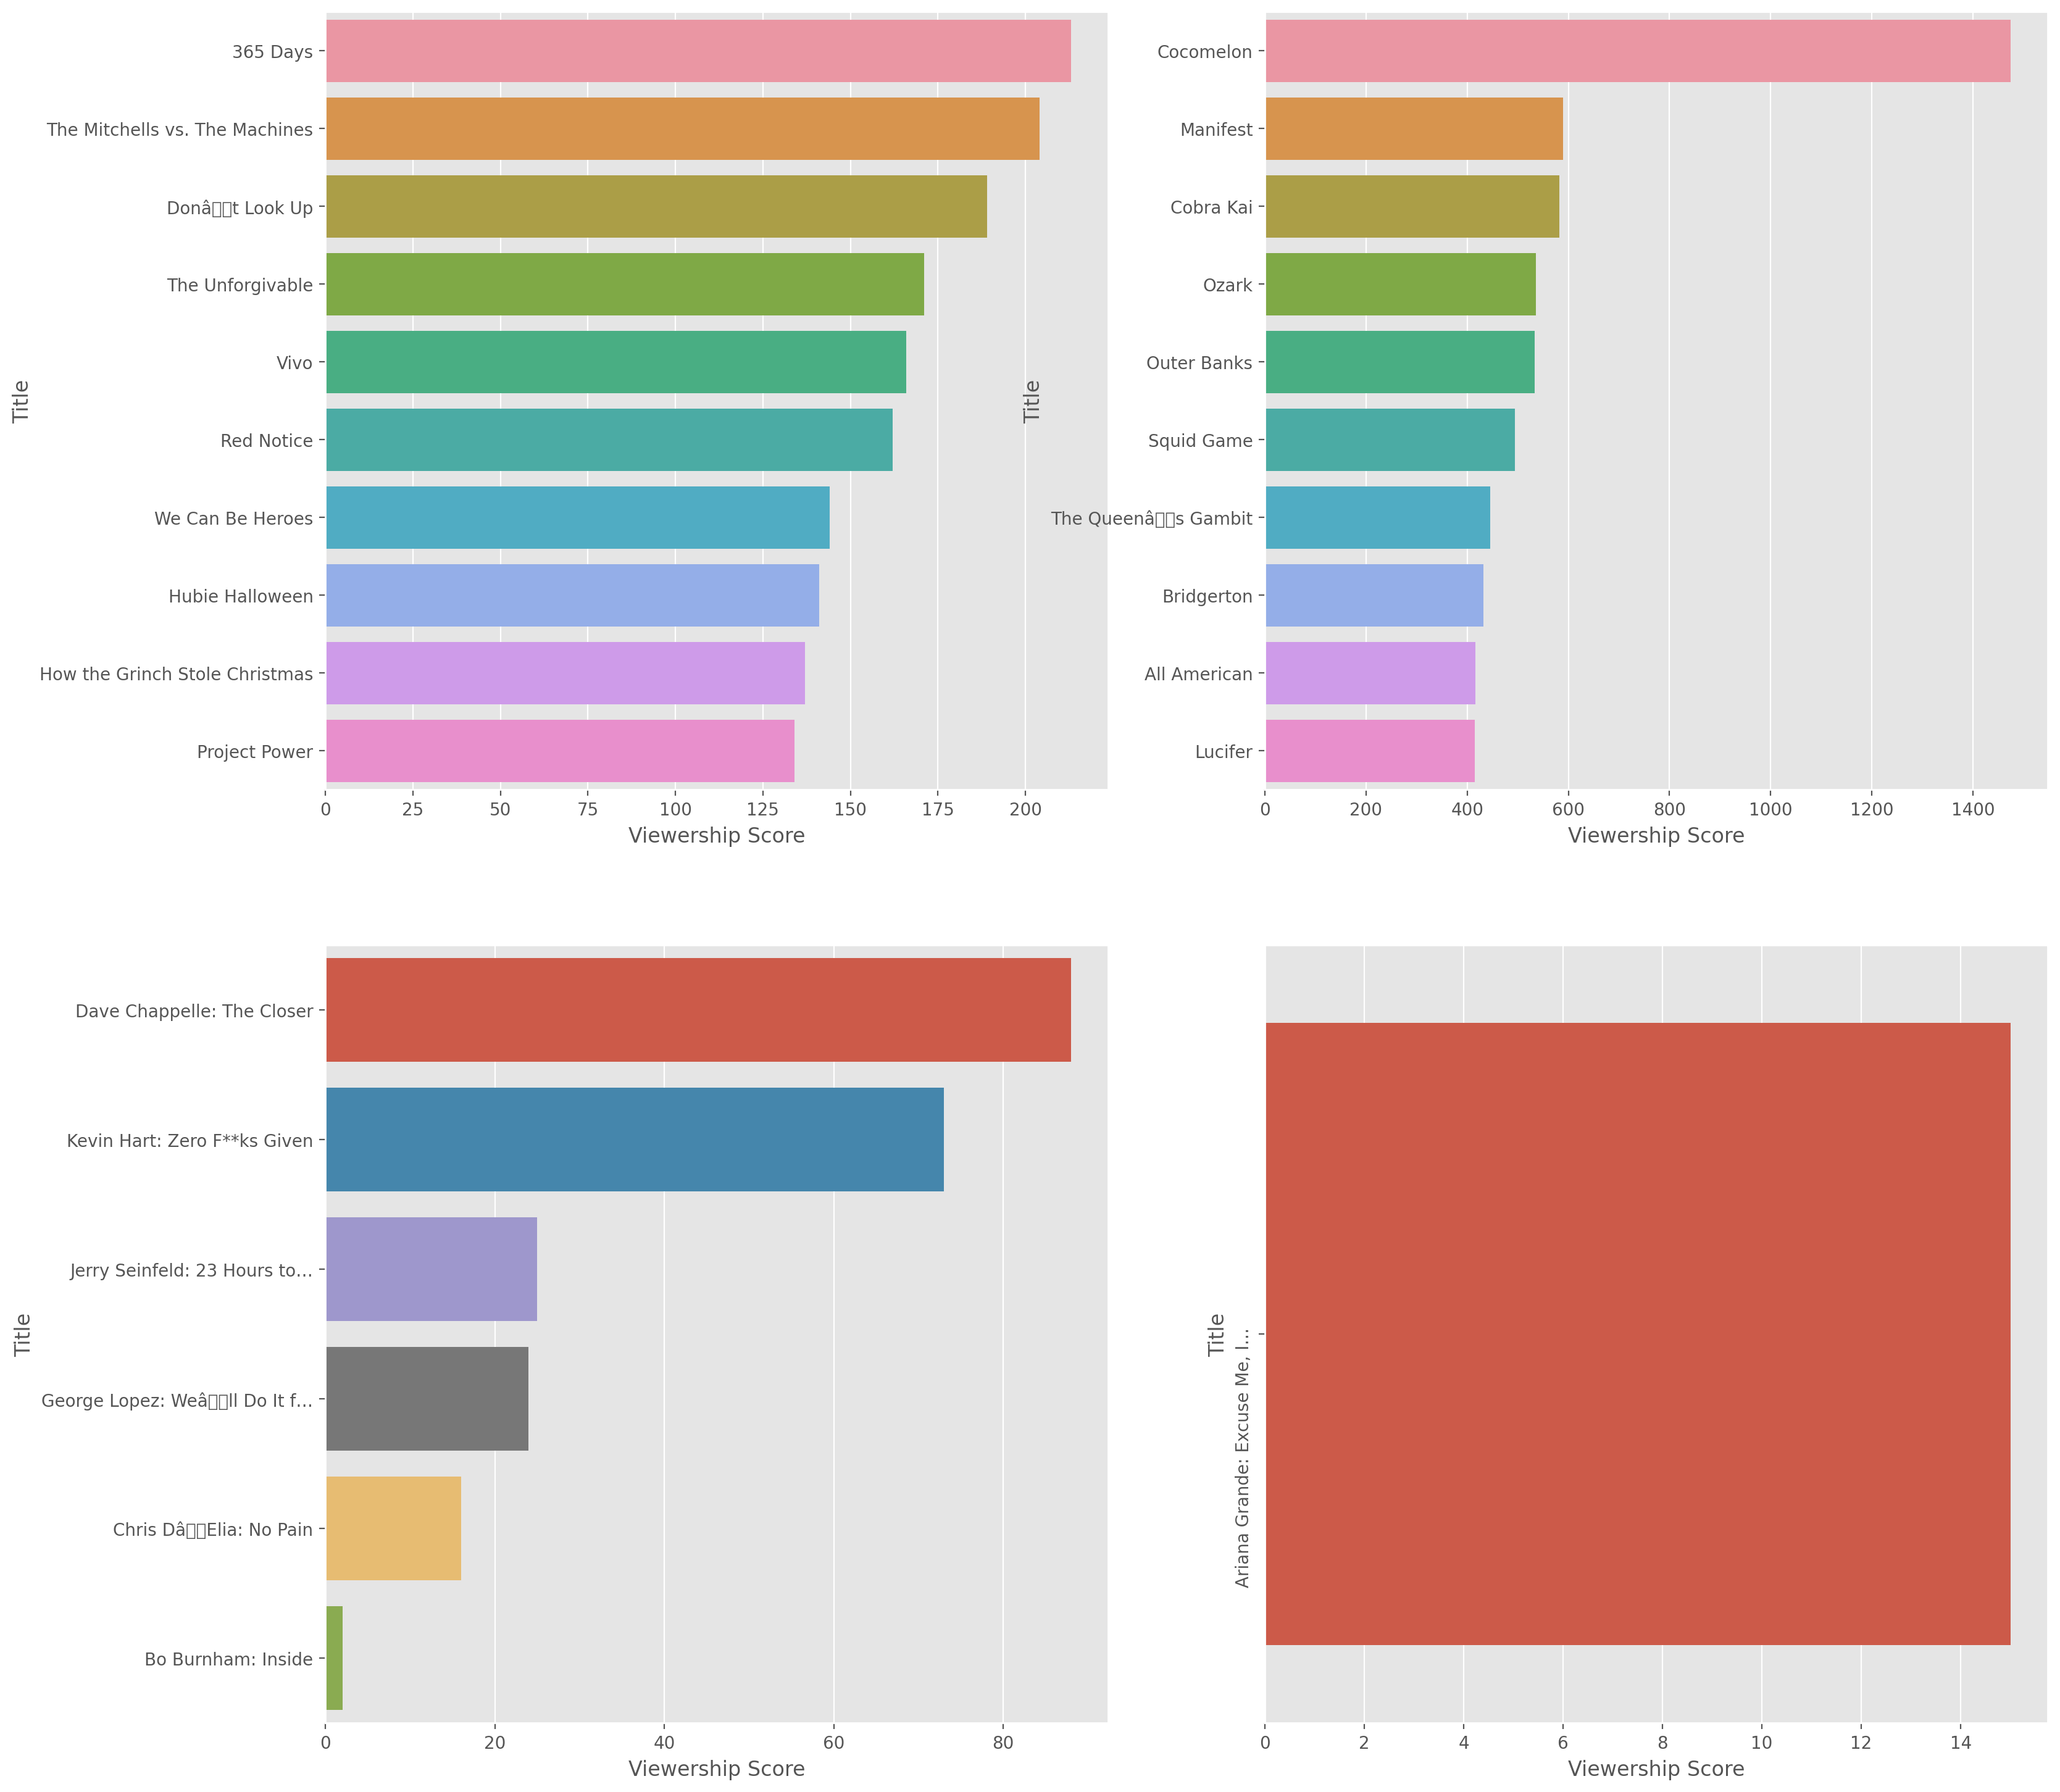

In [23]:
plt.figure(figsize = (18,18), dpi = 200)

plt.subplot(2,2,1)
sns.barplot("Viewership Score","Title",data=movies)

plt.subplot(2,2,2)
sns.barplot("Viewership Score","Title",data=shows)

plt.subplot(2,2,3)
sns.barplot("Viewership Score","Title",data=comedy)

plt.subplot(2,2,4)
sns.barplot("Viewership Score","Title",data=concerts)
plt.yticks(rotation=90)

## Finding the connection between "Days In Top 10" and "Viewership Score"

<AxesSubplot:xlabel='Days In Top 10', ylabel='Viewership Score'>

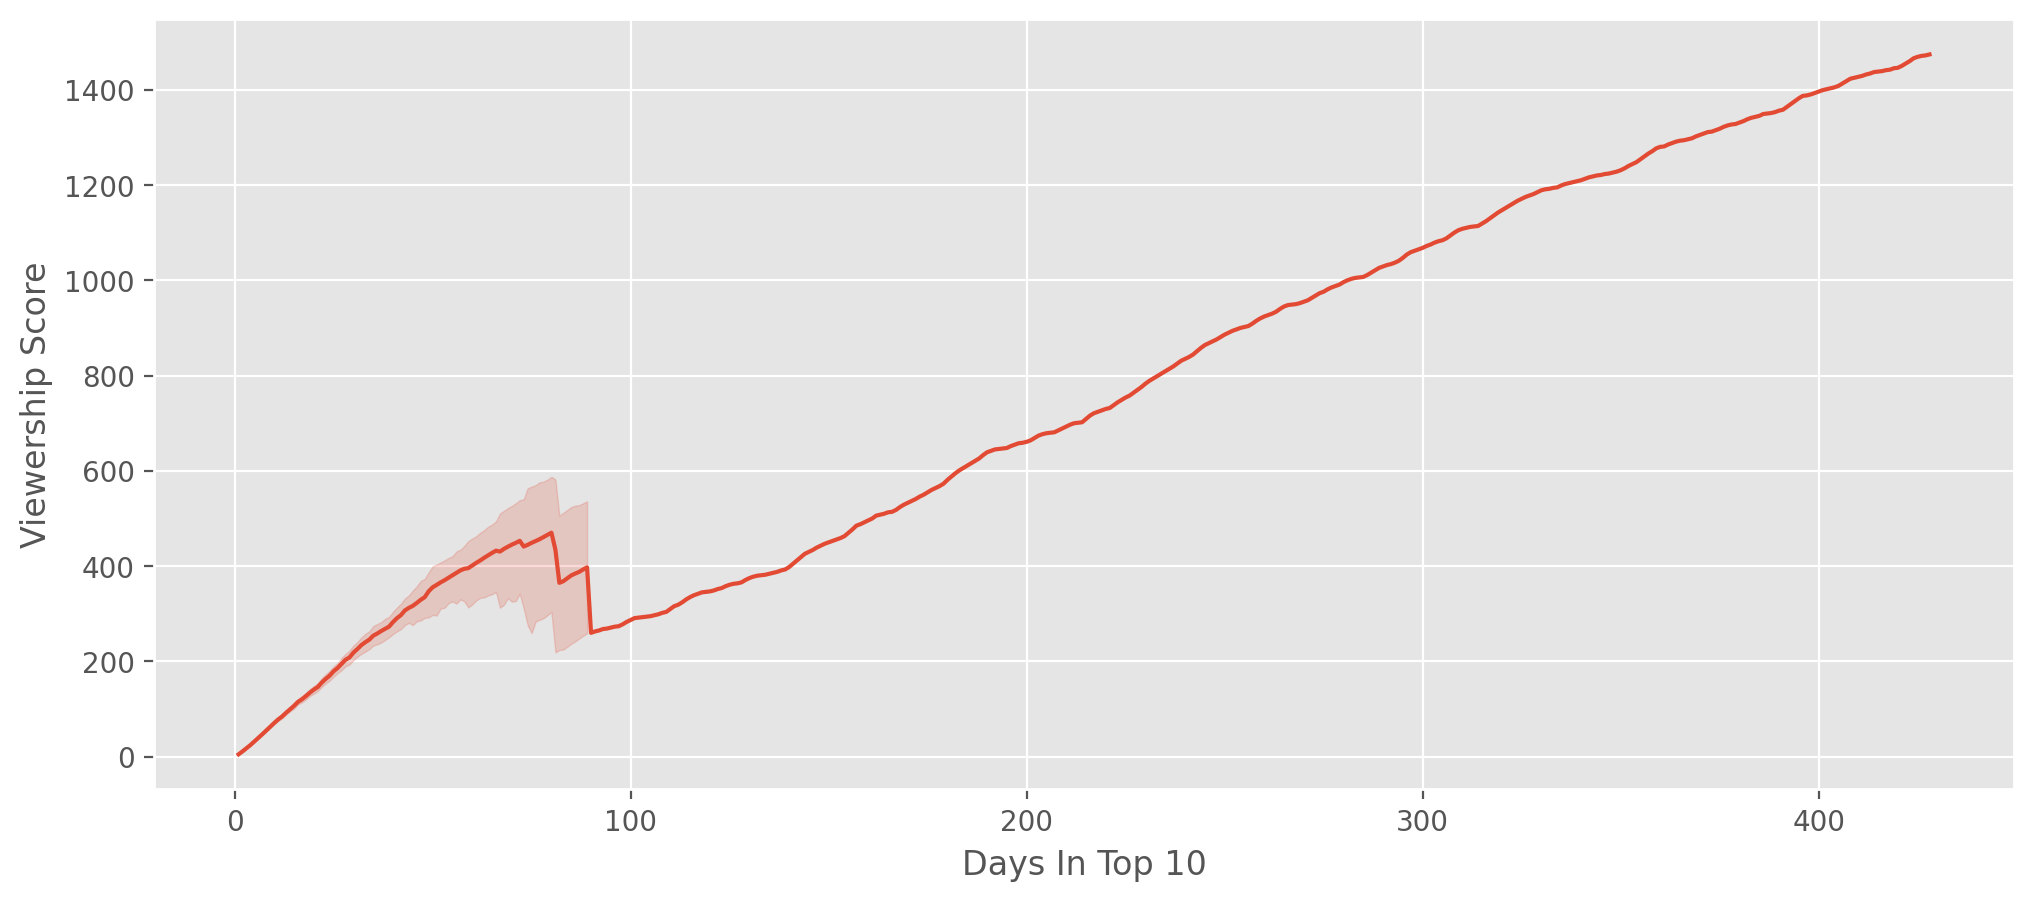

In [24]:
plt.figure(figsize=(12,5),dpi=200)
sns.lineplot("Days In Top 10","Viewership Score",data=netflix)

## ----------------------------------------------------------------------------------------------------------------------------------
## REPORTS ON THE ANALYSIS :

 - Among the all categories of shows on the Netflix, "Tv shows" were the most watched ones which was in the top 10 list for 4446    times during the period 2020-2022. "Movies" being the second with 2611 times in the top 10 list. "Stand up comedy" for 41 
   times and "Concerts" with least no.of times (2).
   
   
 - "Cocomelon" was the topmost show which was in the top 10 list for 428 times during 2020-2022. "Ozark" was the second
    highest show in the top 10 list (85 times) and "Cobra kai" was the third highest (81 times).
    
    
 - Among the Movies cateogory "365 Days" was the topmost movie which had the highest viewership score of 213, 
   "The Mitchells vs. The Machines" is the second highest with maximum score 204 and third highest "Donât Look Up" with a 
   score 189	
 
 
 - Among the Tv Shows cateogory "Cocomelon" was the topmost show which had the highest viewership score of 1474, 
   "Manifest" is the second highest with maximum score 590 and third highest "Cobra Kai" with a score 582
   
   
 - Among the Stand-up Comedy cateogory "Dave Chappelle: The Closer" was the topmost show which had the highest viewership score
   of 88, "Kevin Hart Zero F*ks Given " is the second highest with maximum score 73 and third highest
   "Jerry Seinfeld: 23 Hours to…" with a score 25
   
   
   
 - "Ariana Grande: Excuse Me, I…" is the only concert which came in the top 10 list with a viewership score of 15
 
 
 - Also it was found that there is a high relation between the viewership score and the number of days in top 10.

## ==========================================================================
## Conclusion :

 - During the year 2020-2022 people used Netflix for watching the Tv shows the most than the movies.


- "Cocomelon" was the most watched show with a viewership score of 1474. So most probably the parents might have used 
   netflix for entertaining  their childrens during the covid pandemic.
   
   
 - Among the movies "365 days" had the highest viewership score
 
 
 - The number of times each show appeared in the daily top 10 list has really affected its viewership score also. 
   The more time they came into the top 10 list the more viewership score they had. There was a high relation between the 
   viewership score and the number of days in top 10